# Data prepocessing Final Assigment APP- ECEU601003
## Public Project Analysis Course

* By Redi Sunarta 1606888216 & Dhifani Lutya A 1606829466
---
**Replicating the data processing of one of journal about education http://dx.doi.org/10.1257/app.6.2.105**


In [1]:
import pandas as pd
import numpy as np
import os
import glob
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def fileaddres(path, spes):
    files = []
    #r = root, d=directory, f=files
    for r,d,f in os.walk(path):
        for file in f:
            if re.search(spes, file):
                files.append(os.path.join(r, file))
    return files

In [3]:
# Our working directory
path = "C:/Users/LENOVO/Downloads/Tugas akhir APP/Data"

satu = fileaddres(path, ".csv")
baseline = fileaddres(path+ "/Baseline", r".dta")
endline = fileaddres(path+ "/Endline", r"^[a-fA-F]_.+?.dta")

print ("Total .dta files per folder--", "data:" ,len(satu), "baseline:" ,len(baseline), "endline:", len(endline))

Total .dta files per folder-- data: 6 baseline: 22 endline: 95


| Sample Function  | Code Questioner | 
| ------------- |:-------------:|
| School Committee      | A | 
| Principals | B    |
| Student's Parent | C  |
| Student  | D|
| Teacher  | E |
| Secondary data  | F|

***Our Data come from six quesionare based on the individual sample function, like as a school commites. Thus, we merge the files by that***

## Collecting Baseline Data

In [4]:
comm_b = fileaddres(path+ "/Baseline", r"^A.+.dta")
princ_b = fileaddres(path+ "/Baseline", r"^[Bb].+.dta")
parent_b = fileaddres(path+ "/Baseline", r"^[Cc].+.dta")
stud_b = fileaddres(path+ "/Baseline", r"^[Dd].dta")
teacher_b = fileaddres(path+ "/Baseline", r"^[Ee].+.dta")
second_b = fileaddres(path+ "/Baseline", r"^[Ff].+.dta")

In [5]:
score_b = fileaddres(path+ "/Baseline", r"score.dta")

In [6]:
#example
comm_b

['C:/Users/LENOVO/Downloads/Tugas akhir APP/Data/Baseline\\A1-1.dta',
 'C:/Users/LENOVO/Downloads/Tugas akhir APP/Data/Baseline\\A1-2.dta',
 'C:/Users/LENOVO/Downloads/Tugas akhir APP/Data/Baseline\\A1-2_v2.dta',
 'C:/Users/LENOVO/Downloads/Tugas akhir APP/Data/Baseline\\A1-3.dta',
 'C:/Users/LENOVO/Downloads/Tugas akhir APP/Data/Baseline\\A2-1.dta',
 'C:/Users/LENOVO/Downloads/Tugas akhir APP/Data/Baseline\\A2-2.dta']

In [7]:
baseline_dt = {"comm_b":comm_b, "princ_b":princ_b, "parent_b":parent_b, "stud_b":stud_b, "teacher_b":teacher_b, "second_b":second_b}

#Checking before merge
for i in baseline_dt.keys():
    o = 0
    for j in baseline_dt[i]:
        o += pd.read_stata(j).shape[0]
    # if the result not interger thus, the row of dataframe is different
    print (i,":", o/len(baseline_dt[i]))

comm_b : 520.0
princ_b : 520.0
parent_b : 1560.0
stud_b : 1560.0
teacher_b : 520.0
second_b : 520.0


*We can see that the parent and student group have different unit level observation, but we can create syntetic unique id later, new_id = (id1_id2_id3_id4_id5).This is important before we merge the data.*

---
Moreover luckily, the output doesn't contain float number, which mean within group data file have same row.

In [8]:
pd.read_stata(parent_b[0]).sample(7)

,id1,id2,id3,id4,id5,tgl1,tgl2,jam_m1,jam_m2,jam_s1,...,f3_1b6_3,f3_1b6_4,f3_1b6_5,f3_1a7,f3_1a7lain,f3_1b7_1,f3_1b7_2,f3_1b7_3,f3_1b7_4,f3_1b7_5
1330,C,1,384,2,1,1,2,8,50,9,...,,,,,,,,,,
283,C,5,118,1,1,10,2,12,0,12,...,,,,,,,,,,
921,C,1,454,1,1,12,2,19,25,9,...,,,,,,,,,,
45,C,6,488,3,1,12,2,9,56,10,...,,,,,,,,,,
1269,C,6,484,1,1,8,2,10,0,10,...,,,,,,,,,,
272,C,5,42,1,1,8,2,15,30,16,...,,,,,,,,,,
519,C,4,189,1,1,7,2,13,30,14,...,,,,,,,,,,


In [9]:
def storedata(data):
    o = {}
    for i in data:
        x = pd.read_stata(i)
        # Not all columns name have lowercase even the same value
        x.columns = map(str.lower, x.columns)
        x.columns = x.columns.str.replace("_", "")
        y = x[["id1", "id2", "id3", "id4", "id5"]]
        #x[["id2", "id3", "id4", "id5"]] = x[["id2", "id3", "id4", "id5"]].astype("int")
        x[["id1", "id2", "id3", "id4", "id5"]] = x[["id1", "id2", "id3", "id4", "id5"]].astype("str")
        #The combination columns will be index
        x["new_id"] = x["id1"]  + "_" + x["id2"] + "_" + x["id3"] + "_" + x["id4"] + "_" + x["id5"]
        x = x.set_index("new_id")
        x[["id1", "id2", "id3", "id4", "id5"]] = y
        x.columns = [str(x.index[0][0]).lower() + str(col) for col in x.columns]
        o[i[-10:-3]] = x
    return o

In [10]:
our_baselinedata = {"comm_b":storedata(comm_b), "princ_b":storedata(princ_b), "parent_b":storedata(parent_b), "stud_b":storedata(stud_b), "teacher_b":storedata(teacher_b), "second_b":storedata(second_b)}

**We exclude the 'average_score.dta' and 'score.dta' because doesn't have id1 to id5 columns name, even though they have idgen which contain distrcit code and school code + str(1) in last code. Because not all our data file have same unit analysis -school level.**

In [11]:
baseline_merged = {}
for i in our_baselinedata.keys():
    baseline_merged[i] = pd.concat(our_baselinedata[i].values(), axis=1)
    #baseline_merged[i]["index"] = baseline_merged[i].index.str.split("_", expand=False).str[0].str[2:]

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


### Baseline Dataframe Example

Text(0.5,1,'Missing Values (NaN) Map Each Column')

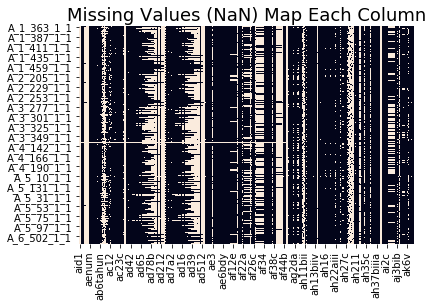

In [12]:
sns.heatmap(baseline_merged["comm_b"].isnull(), cbar=False)
plt.title("Missing Values (NaN) Map Each Column", size=18)

*Several column have large missing values. But not sure, or probably just missed detection*

In [13]:
for i in baseline_merged.keys():
    print (i, baseline_merged[i].shape[0])

comm_b 523
princ_b 522
parent_b 1561
stud_b 1560
teacher_b 520
second_b 1040


Parent, student, and secondary data have disaggregation more than shool level. Thus, we need aggregation those data

In [14]:
# baseline_kita.to_csv("baseline.csv")

## Collecting Endline Data

### Actually the algoritm similar how baseline data merge, but more compliated because the size of data larger.

In [15]:
comm_e = fileaddres(path+ "/Endline", r"^[Aa]_.+?.dta")
princ_e = fileaddres(path+ "/Endline", r"^[Bb]_.+?.dta")
parent_e = fileaddres(path+ "/Endline", r"^[Cc]_.+?.dta")
stud_e = fileaddres(path+ "/Endline", r"^[Dd]_.+?.dta")
teacher_e = fileaddres(path+ "/Endline", r"^[Ee]_.+?.dta")
second_e = fileaddres(path+ "/Endline", r"^[Ff]_.+?.dta")

In [16]:
score_e = fileaddres(path+ "/Endline", r"test")

In [17]:
endline_dt = {"comm_e":comm_e, "princ_e":princ_e, "parent_e":parent_e, "stud_e":stud_e, "teacher_e":teacher_e, "second_e":second_e}

#Checking before merge
for i in endline_dt.keys():
    o = 0
    for j in endline_dt[i]:
        o += pd.read_stata(j).shape[0]
    # if the result not interger thus, the row of dataframe is different
    print (i,":", o/len(endline_dt[i]))

comm_e : 736.25
princ_e : 518.0
parent_e : 1669.5714285714287
stud_e : 1560.6666666666667
teacher_e : 752.5625
second_e : 1435.1764705882354


*Just the output of principal group which contain interger number. So, merge processing will be more take time. We should check the values of each member witihn group. For simplify, if there are few data file very different, then we'll exclude them.*

In [18]:
for i in comm_e[2:5]:
    print (pd.read_stata(i).columns)

Index(['issa_del', 'issa_id', 'issa_sec', 'ac11x', 'ac11', 'ac12', 'ac13a',
       'ac13b', 'ac14x', 'ac14bln', 'ac14thn', 'ac15', 'ac16a', 'ac16b',
       'ac16c', 'ac16c_lain', 'ac17a', 'ac17b', 'ac18', 'ac21', 'ac21_lain',
       'ac22a', 'ac22b_a', 'ac22b_b', 'ac22b_c', 'ac22b_d', 'ac22b_e',
       'ac22b_f', 'ac22b_g', 'ac22b_h', 'ac22b_v', 'ac22b_v_lain', 'ac22b_y',
       'ac23_a', 'ac23_b', 'ac23_c', 'ac23_d', 'ac23_e', 'ac23_f', 'ac23_g',
       'ac23_h', 'ac23_v', 'ac23_v_lain', 'ac23_y', 'ac24', 'ac24_lain',
       'ac25', 'ac25_lain', 'ac26', 'ac26_lain'],
      dtype='object')
Index(['issa_del', 'issa_id', 'issa_sec', 'astrata', 'akab', 'aea', 'ano',
       'awave', 'akode', 'anmpww', 'acdpww', 'anmedt', 'acdedt', 'anmsup',
       'acdsup', 'aco0', 'aco00', 'aco1a', 'aco1tgl', 'aco1tgl1', 'aco1tgl2',
       'aco1bln', 'aco1bln1', 'aco1bln2', 'aco1thn', 'aco1thn1', 'aco1thn2',
       'aco2jam', 'aco2jam1', 'aco2jam2', 'aco2mnt', 'aco2mnt1', 'aco2mnt2',
       'aco3jam', 'ac

**We'll use issa_id columns as the keys columns**

In [19]:
for j, i in enumerate(comm_e):
    print (j, pd.read_stata(i).shape)

0 (517, 12)
1 (517, 47)
2 (517, 50)
3 (520, 52)
4 (4899, 18)
5 (517, 4)
6 (517, 76)
7 (517, 38)
8 (517, 39)
9 (517, 61)
10 (517, 32)
11 (517, 44)
12 (517, 65)
13 (517, 65)
14 (517, 41)
15 (517, 53)
16 (517, 17)
17 (517, 46)
18 (517, 37)
19 (517, 31)


### Exclude the index 4 -group A

In [20]:
def pilihan(data):
    df = pd.read_stata(data[0])
    for i in data[1:]:
        x = pd.read_stata(i)
        df = pd.merge(df, x, left_on="issa_id", right_on="issa_id")
    df.columns = df.columns.str.replace("_", "")
    df["index"] = df["issaid"].str[1:]
    df = df.set_index("index")
    return df

#### Index = issa_id[1:] to eliminated group sign (i.e. A, B, F, etc). We get example :1_363_1_3 (district code_school code_idk_idk)

In [21]:
for i in comm_e:
    if "issa_id" not in pd.read_stata(i).columns:
        print (i)

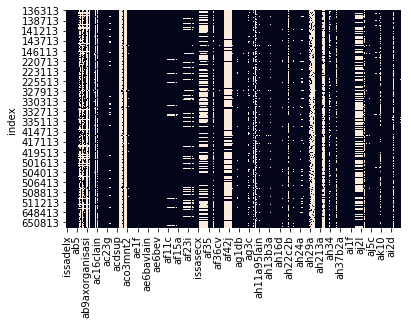

In [22]:
k = comm_e[:4]
for j in comm_e[5:]:
    k.append(j)
    
comm_e_data = pilihan(k)
sns.heatmap(comm_e_data.isnull(), cbar=False)

### Include all -group B

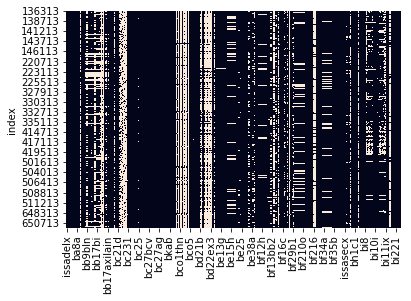

In [23]:
princ_e_data = pilihan(princ_e)
sns.heatmap(princ_e_data.isnull(), cbar=False)

In [24]:
for j, i in enumerate(parent_e):
    print (j, pd.read_stata(i).shape)

0 (1563, 13)
1 (1563, 18)
2 (3322, 16)
3 (1563, 14)
4 (1573, 51)
5 (1563, 18)
6 (1563, 26)
7 (520, 9)
8 (520, 14)
9 (1559, 8)
10 (520, 12)
11 (1559, 11)
12 (1559, 30)
13 (1559, 28)
14 (1559, 9)
15 (520, 13)
16 (1559, 8)
17 (6236, 6)
18 (1559, 12)
19 (1559, 21)
20 (1563, 19)


### Divide by 3 subgroup -group C

In [25]:
k = []
m = []
b = []
for j, i in enumerate(parent_e):
    if pd.read_stata(i).shape[0] <= 521:
        k.append(i)
    elif pd.read_stata(i).shape[0] <= 2000:
        m.append(i)
    else:
        b.append(i)

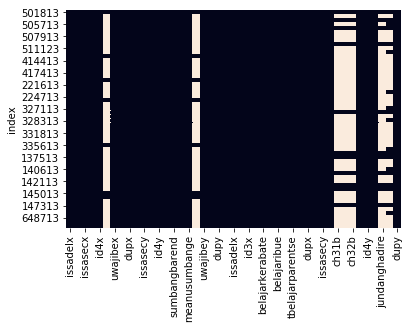

In [26]:
parent_e_data1 = pilihan(k)
parent_e_data2 = pilihan(m)
parent_e_data3 = pilihan(b)

sns.heatmap(parent_e_data1.isnull(), cbar=False)

In [27]:
for j, i in enumerate(stud_e):
    print (j, pd.read_stata(i).shape)

0 (1558, 12)
1 (1558, 24)
2 (1558, 10)
3 (1584, 51)
4 (1558, 19)
5 (1548, 7)


### Include all -group D

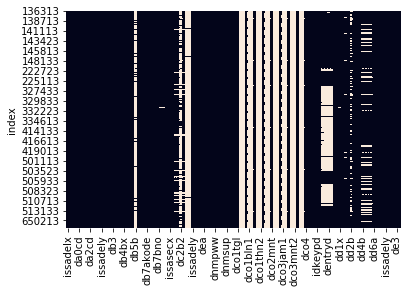

In [28]:
stud_e_data = pilihan(stud_e)
sns.heatmap(stud_e_data.isnull(), cbar=False)

In [29]:
for j, i in enumerate(teacher_e):
    print (j, pd.read_stata(i).shape)

0 (518, 12)
1 (518, 25)
2 (4300, 6)
3 (518, 41)
4 (518, 51)
5 (518, 17)
6 (518, 19)
7 (518, 27)
8 (518, 11)
9 (513, 29)
10 (512, 22)
11 (512, 10)
12 (512, 17)
13 (512, 8)
14 (518, 10)
15 (518, 21)


### Exclude the index 2 -group E

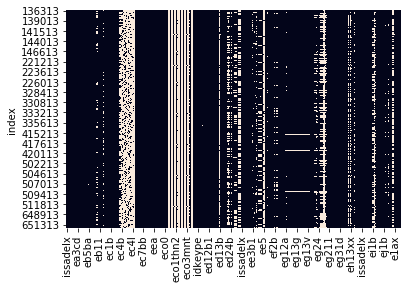

In [30]:
k = teacher_e[:2]
for j in teacher_e[3:]:
    k.append(j)
    
teacher_e_data = pilihan(k)
sns.heatmap(teacher_e_data.isnull(), cbar=False)

In [31]:
for j, i in enumerate(second_e):
    print (j, pd.read_stata(i).shape)

0 (517, 12)
1 (517, 8)
2 (517, 15)
3 (517, 52)
4 (517, 79)
5 (517, 12)
6 (1034, 10)
7 (517, 9)
8 (517, 103)
9 (6216, 9)
10 (518, 6)
11 (518, 5)
12 (5255, 13)
13 (517, 23)
14 (5170, 7)
15 (517, 43)
16 (517, 20)


### Divide by 3 subgroup -group F

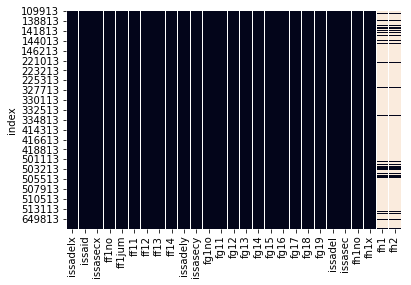

In [32]:
k = []
m = []
b = []
for j, i in enumerate(second_e):
    if pd.read_stata(i).shape[0] <= 521:
        k.append(i)
    elif pd.read_stata(i).shape[0] <= 2000:
        m.append(i)
    else:
        b.append(i)
        
second_e_data1 = pilihan(k)
second_e_data2 = pilihan(m)
second_e_data3 = pilihan(b)

sns.heatmap(second_e_data3.isnull(), cbar=False)

In [33]:
endline_merged = {"comm_e_data":comm_e_data, "princ_e_data":princ_e_data, "parent_e_data1":parent_e_data1, "parent_e_data2":parent_e_data2, "parent_e_data3":parent_e_data3, "stud_e_data":stud_e_data, "teacher_e_data":teacher_e_data, "second_e_data1":second_e_data1, "second_e_data2":second_e_data2, "second_e_data3":second_e_data3}

## Selecting Interest Columns (Endline)

In [34]:
endline_merged_columns = {}
baseline_merged_columns = {}
for i in endline_merged.keys():
    endline_merged_columns[i] = (endline_merged[i].columns)

for i in baseline_merged.keys():
    baseline_merged_columns[i] = (baseline_merged[i].columns)
    
# Store All columns name
columns_name = {"baseline_columns": baseline_merged_columns, "endline_columns":endline_merged_columns}

In [35]:
# Panel A in Intermediate Variable List
kolom = pd.read_csv("namecolumns.txt", header=None, sep="\t")
kolom[0] = kolom[0].str.strip().str.lower().str.capitalize()
kolom[1] = kolom[1].str.strip().str.lower()
kolom[2] = kolom[2].str.strip().str.lower()
kolom["Group"] = kolom[2].str[0].str.upper()

In [36]:
kolom = kolom.drop_duplicates().dropna()
kolom.sample(5)

,0,1,2,Group
52,Pmtgrapbs,ch21,ch21,C
5,Scparinkind,ah13a1,ah13a1,A
0,Column1.1.1,dataset_source_end,dataset_source_base,D
30,Pknow_scexist,cj1,cj1,C
41,Tscperception_d,eh21d,eh21d,E


In [37]:
# Checking in all endline column
there = []
lost = []
for index, x in enumerate(kolom[1]):
    for i in endline_merged_columns.keys():
        if x in (endline_merged_columns[i]):
            there.append(x)
        else:
            lost.append(x)

def check(data):
    if data[1] not in there:
        return False
    else:
        return True
kolom["check"] = kolom.apply(lambda data: check(data), axis=1)
kolom.reset_index(inplace=True)
len(there)

45

In [38]:
kolom[kolom["check"] == False]

,index,0,1,2,Group,check
0,0,Column1.1.1,dataset_source_end,dataset_source_base,D,False
3,3,Pcont_bar,sumbangend,ce22bii,C,False
9,9,Pnsteach,fg14 =1,fg14 =1,F,False
10,10,Gttteach_govt1,fg14=2,fg14=2,F,False
11,11,Gttteach_govt2,fg14=3,fg14=3,F,False
12,12,Gttteach_school,fg14=4,fg14=4,F,False
51,53,Prapbs,ci21d,ci21d,C,False


In [39]:
data_interest = {}
for j in there:
    for i in endline_merged.keys():
        if j in endline_merged[i].columns:
            data_interest[j] = endline_merged[i][j]

In [40]:
for i in data_interest.keys():
    print (i, len(data_interest[i]))

usumbange 54
sumbanguend 54
sumbangbarend 54
ah13a1 517
ah11b1 517
fg0row 517
fg14 629520
af33c 517
ac17a 517
bf39a4 518
ci2no 13256
ci21 13256
ak5 517
ak8 517
bg5 518
bg8 518
ae1b 517
cg1b 1544
ec1b 512
bc21b 518
cj1 1544
cj3a 1544
cj4 1544
bf215a 518
bf215b 518
bf215c 518
bf215d 518
ah15 517
eh21a 512
eh21b 512
eh21c 512
eh21d 512
ah13c1 517
ah11b2 517
af11b 517
ah37a4 517
bf210c 518
ch21 1544


### I don't know why the row values of columns fg14 is so large and sumbangbarend so small
----
***Thus, We need to check again nor storing data manually***

In [41]:
data = pd.DataFrame()
for i in data_interest.keys():
    if len(data_interest[i]) <= 1000 and len(data_interest[i]) >= 100:
        p = pd.Series(data_interest[i])
        data = pd.concat([data, p], axis=1, join="outer", sort=False)

**Sumbanguend and sumbangbarend column small because the zero values detect as null**

In [42]:
data1 = pd.DataFrame([data_interest["usumbange"], data_interest["sumbangbarend"]]).T
data1 = pd.concat([data, data1], axis=1, sort=False)
data1.sample(2)

,ah13a1,ah11b1,fg0row,af33c,ac17a,bf39a4,ak5,ak8,bg5,bg8,...,eh21b,eh21c,eh21d,ah13c1,ah11b2,af11b,ah37a4,bf210c,usumbange,sumbangbarend
335413,1. 1.ya,NaN,9.0,3. 3.tidak,3. 3.tidak,1. 1.ya,3. 3.tidak,3. 3.besar,NaN,NaN,...,10.0,10.0,9.0,3. 3.besar,NaN,3.0,1. 1.ya,1. 1.ya,NaN,NaN
327713,1. 1.ya,1000.0,9.0,NaN,3. 3.tidak,1. 1.ya,1. 1.ya,3. 3.besar,1. 1.ya,3. 3.besar,...,7.0,8.0,7.0,3. 3.besar,NaN,1.0,1. 1.ya,1. 1.ya,NaN,NaN


In [43]:
#rename the columns 
renam = {}

for i in range(1, len(kolom)):
    renam[kolom[1][i]] = kolom[0][i]

data1 = data1.rename(columns=renam)

### We can use guru dataframe to get 'False' columns -group F in kolom

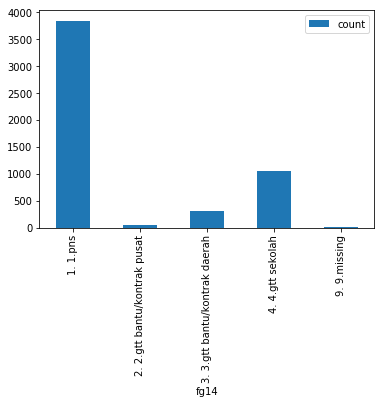

In [44]:
l = pd.DataFrame(data_interest["fg14"])
l["x"] = 1
guru = l.groupby([l.index, "fg14"]).count()
guru["count"] = guru["x"] / 120
guru.reset_index(inplace=True)
guru[["count", "fg14"]].groupby("fg14").sum().plot(kind="bar")

In [45]:
guru.set_index("index", inplace=True)
pns = guru[guru["fg14"] == "1. 1.pns"][[ "count"]].rename(columns={"count":"Pnsteach"})
pusat = guru[guru["fg14"] == "2. 2.gtt bantu/kontrak pusat"][["count"]].rename(columns={"count":"Gttteach_govt1"})
daerah = guru[guru["fg14"] == "3. 3.gtt bantu/kontrak daerah"][["count"]].rename(columns={"count":"Gttteach_govt2"})
sekolah = guru[guru["fg14"] == "4. 4.gtt sekolah"][["count"]].rename(columns={"count":"Gttteach_school"})

TC = pd.concat([pns, pusat, daerah, sekolah], axis=1)

# Hire by local gov't or central gov't
TC["Gttteach_govt"] = TC["Gttteach_govt1"] + TC["Gttteach_govt2"]

In [46]:
data2 = pd.concat([data1, TC], axis=1, sort=False)
data2.sample(5)

,Scparinkind,Scparfundraise_a,Tjumlah,Scrapbs,Screcrapbs,Spparentsrapbs,Scbpd,Scsatbpd,Spbpd,Spsatbpd,...,Scmeettripartite,Scdistrapbs,Spinviterapbs,Pcont,Pcont_physical,Pnsteach,Gttteach_govt1,Gttteach_govt2,Gttteach_school,Gttteach_govt
510913,3. 3.tidak,NaN,11.0,3. 3.tidak,3. 3.tidak,3. 3.tidak,1. 1.ya,3. 3.besar,3. 3.tidak,3. 3.besar,...,3.0,3. 3.tidak,NaN,NaN,NaN,7.0,NaN,NaN,4.0,NaN
413513,3. 3.tidak,NaN,9.0,NaN,3. 3.tidak,3. 3.tidak,3. 3.tidak,2. 2.kurang,1. 1.ya,2. 2.kurang,...,2.0,3. 3.tidak,1. 1.ya,NaN,NaN,7.0,NaN,NaN,2.0,NaN
505213,3. 3.tidak,NaN,9.0,1. 1.ya,3. 3.tidak,1. 1.ya,3. 3.tidak,2. 2.kurang,3. 3.tidak,2. 2.kurang,...,3.0,1. 1.ya,1. 1.ya,NaN,NaN,7.0,NaN,NaN,2.0,NaN
138713,3. 3.tidak,NaN,9.0,NaN,3. 3.tidak,1. 1.ya,3. 3.tidak,2. 2.kurang,3. 3.tidak,2. 2.kurang,...,2.0,1. 1.ya,1. 1.ya,NaN,NaN,8.0,NaN,NaN,1.0,NaN
333713,3. 3.tidak,NaN,9.0,NaN,3. 3.tidak,1. 1.ya,1. 1.ya,3. 3.besar,NaN,NaN,...,1.0,1. 1.ya,1. 1.ya,NaN,NaN,7.0,NaN,2.0,NaN,NaN


### The unit analysis, based on assigment, is shool level. 
---
#### Thus, if we get the data individual level, we need to doing logical aggregation. Even though, the lecturer -Bu Rima- suggest that get the average values is enough.

In [47]:
data3 = pd.DataFrame()
for i in data_interest.keys():
    if len(data_interest[i]) >= 1000 and len(data_interest[i]) < 10000:
        p = pd.Series(data_interest[i])
        data3 = pd.concat([data3, p], axis=1, join="outer", sort=False)

In [48]:
data3["index_school"] = data3.index.str[:4]
data3.sample(5)

,cg1b,cj1,cj3a,cj4,ch21,index_school
index,,,,,,
419623,3. 3.memuaskan,1. 1.ya,3. 3.sangat besar,D,3. 3.tidak,4196
331213,2. 2.belum memuaskan,1. 1.ya,1. 1.tidak satupun,EV,1. 1.ya,3312
332113,2. 2.belum memuaskan,1. 1.ya,1. 1.tidak satupun,Y,3. 3.tidak,3321
141413,3. 3.memuaskan,1. 1.ya,3. 3.sangat besar,CE,3. 3.tidak,1414
508833,8. 8.tidak tahu,1. 1.ya,1. 1.tidak satupun,Y,3. 3.tidak,5088


#### Column cj4, A - G or V = 1, W or Y = 0. Thus, if the values is ABV equal to 3; max score is 9. The school score will be average of individual score

In [49]:
def split(char, n):
    char = str(char)
    j = list(char)
    score = 0
    for i in j:
        if re.search(r"[A-VZ]", i):
            score += 1
    final = score/n
    return final

data3["Pscanswer"] = data3.cj4.apply(lambda char: split(char, 9))
data3.sample(2)

,cg1b,cj1,cj3a,cj4,ch21,index_school,Pscanswer
index,,,,,,,
224713,8. 8.tidak tahu,3. 3.tidak,NaN,,8. 8.tidak tahu,2247,0.000000
332513,3. 3.memuaskan,1. 1.ya,3. 3.sangat besar,G,3. 3.tidak,3325,0.111111


#### Column ch21 and cj1 is actually binary --Yes and No.  We can make Yes = 1, otherwise = 0. Thus, The school score will be precentage of Yes Answer

In [50]:
data3["Pknow_scexist"] = data3.cj1.str[0].apply(lambda x : 1 if x == "1" else 0)
data3["Pmtgrapbs"] = data3.ch21.str[0].apply(lambda x : 1 if x == "1" else 0)
data3.sample(2)

,cg1b,cj1,cj3a,cj4,ch21,index_school,Pscanswer,Pknow_scexist,Pmtgrapbs
index,,,,,,,,,
649933,3. 3.memuaskan,1. 1.ya,2. 2.sebagian kecil,Y,3. 3.tidak,6499,0.0,1,0
503723,2. 2.belum memuaskan,3. 3.tidak,NaN,,3. 3.tidak,5037,0.0,0,0


#### Column cg1b and cj3a is category variable (ordinal). Simfly, we can average them.  ***But cg1b contains don't know answer and not fair if we convert to zero. We will values them as average the range 1+4/2 = 2.5***

In [51]:
data3["Psatlearnknow"] = data3.cg1b.str[0].apply(lambda x : "2.5" if x=="8" else x).astype("float")
data3["Pknow_scmem"] = data3.cj3a.str[0].apply(lambda x : np.nan if x=="9" else x).astype("float")
data3.sample(3)

,cg1b,cj1,cj3a,cj4,ch21,index_school,Pscanswer,Pknow_scexist,Pmtgrapbs,Psatlearnknow,Pknow_scmem
index,,,,,,,,,,,
326933,3. 3.memuaskan,3. 3.tidak,NaN,,3. 3.tidak,3269,0.000000,0,0,3.0,NaN
137333,2. 2.belum memuaskan,1. 1.ya,3. 3.sangat besar,DG,1. 1.ya,1373,0.222222,1,1,2.0,3.0
330933,2. 2.belum memuaskan,1. 1.ya,1. 1.tidak satupun,EV,1. 1.ya,3309,0.222222,1,1,2.0,1.0


In [52]:
#selected clean columns
data3 = data3.iloc[:, -6:]
data3 = data3.groupby("index_school").mean()

In [53]:
data2["index_school"] = data2.index.str[:4]
data2.reset_index(inplace=True)
data2.set_index("index_school", inplace=True)
data3 = pd.merge(data2, data3, left_index=True, right_index=True,how="outer")

#### Column ch21 ci2no is the answer of information from the school to parents about fee, program, funding, and budget. 
therefore, the values of row is 13256 which mean the total parent obs. is 3314

In [54]:
data4 = pd.concat([data_interest["ci2no"], data_interest["ci21"]], axis=1)
data4["ci21"] = data4["ci21"].str[0].apply(lambda x : 1 if x=="1" else 0)
data4a = data4[data4["ci2no"] == "A"][["ci21"]].rename(columns={"ci21":"Prap_a"})
data4a["Prap_b"] = data4[data4["ci2no"] == "B"]["ci21"]
data4a["Prap_c"] = data4[data4["ci2no"] == "C"]["ci21"]
data4a["Prap_d"] = data4[data4["ci2no"] == "D"]["ci21"]
data4a["Prap_score"] = data4a.sum(axis=1)
data4a["index_school"] = data4a.index.str[:4]
data4 = data4a.groupby("index_school").mean()

In [55]:
data4 = pd.merge(data3, data4, left_index=True, right_index=True,how="outer")
data4["Scparfundraise"] = data4[["Scparfundraise_a", "Scparfundraise_b"]].sum(axis=1)
data4.sample(3)

,index,Scparinkind,Scparfundraise_a,Tjumlah,Scrapbs,Screcrapbs,Spparentsrapbs,Scbpd,Scsatbpd,Spbpd,...,Pknow_scexist,Pmtgrapbs,Psatlearnknow,Pknow_scmem,Prap_a,Prap_b,Prap_c,Prap_d,Prap_score,Scparfundraise
index_school,,,,,,,,,,,,,,,,,,,,,
3264,326413,1. 1.ya,5000.0,11.0,3. 3.tidak,3. 3.tidak,1. 1.ya,1. 1.ya,3. 3.besar,1. 1.ya,...,0.500000,1.0,3.000000,2.000000,0.333333,0.333333,0.333333,0.0,1.000000,2005000.0
6506,650613,1. 1.ya,NaN,13.0,1. 1.ya,1. 1.ya,1. 1.ya,1. 1.ya,3. 3.besar,1. 1.ya,...,1.000000,0.0,2.333333,2.666667,1.000000,1.000000,1.000000,1.0,4.000000,0.0
4140,414013,3. 3.tidak,20000.0,8.0,1. 1.ya,1. 1.ya,3. 3.tidak,1. 1.ya,2. 2.kurang,1. 1.ya,...,0.666667,0.0,2.666667,1.500000,0.571429,0.285714,0.000000,0.0,0.857143,20000.0


## Clean the object variable

In [56]:
data = data4.iloc[:, :]
data["Scparfundraise"] = data["Scparfundraise"].astype("float")
data["Spinviterapbs_score"] = data["Spinviterapbs"].apply(lambda char: split(char, 9))
data["Tscperception"] = data[["Tscperception_a", "Tscperception_b", "Tscperception_c", "Tscperception_d"]].mean(axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522 entries, 1099 to 6520
Data columns (total 48 columns):
index                  521 non-null object
Scparinkind            517 non-null category
Scparfundraise_a       88 non-null category
Tjumlah                517 non-null float64
Scrapbs                252 non-null category
Screcrapbs             517 non-null category
Spparentsrapbs         518 non-null category
Scbpd                  498 non-null category
Scsatbpd               498 non-null category
Spbpd                  489 non-null category
Spsatbpd               489 non-null category
Scsatlearn             517 non-null category
Tsatlearn              512 non-null category
Spsatlearn             518 non-null category
Spsceffective_a        518 non-null category
Spsceffective_b        518 non-null category
Spsceffective_c        518 non-null category
Spsceffective_d        518 non-null category
Scposcontr             517 non-null category
Tscperception_a        512 non-null float64
T

In [57]:
clean = data.select_dtypes(include="category")
clean.sample(5)

,Scparinkind,Scparfundraise_a,Scrapbs,Screcrapbs,Spparentsrapbs,Scbpd,Scsatbpd,Spbpd,Spsatbpd,Scsatlearn,...,Spsatlearn,Spsceffective_a,Spsceffective_b,Spsceffective_c,Spsceffective_d,Scposcontr,Scsizeinkind,Scparfundraise_b,Scdistrapbs,Spinviterapbs
index_school,,,,,,,,,,,,,,,,,,,,,
2262,3. 3.tidak,7500.0,NaN,3. 3.tidak,3. 3.tidak,3. 3.tidak,3. 3.besar,3. 3.tidak,3. 3.besar,3. 3.memuaskan,...,3. 3..memuaskan,1. 1.ya,1. 1.ya,1. 1.ya,1. 1.ya,1. 1.ya,NaN,NaN,3. 3.tidak,1. 1.ya
1447,3. 3.tidak,NaN,1. 1.ya,1. 1.ya,1. 1.ya,3. 3.tidak,3. 3.besar,3. 3.tidak,2. 2.kurang,2. 2.belum memuaskan,...,2. 2.belum memuaskan,1. 1.ya,1. 1.ya,3. 3.tidak,3. 3.tidak,1. 1.ya,NaN,NaN,1. 1.ya,NaN
6488,1. 1.ya,NaN,NaN,3. 3.tidak,1. 1.ya,1. 1.ya,3. 3.besar,3. 3.tidak,2. 2.kurang,3. 3.memuaskan,...,2. 2.belum memuaskan,1. 1.ya,2. 2.kurang,2. 2.kurang,1. 1.ya,1. 1.ya,3. 3.besar,200000.0,1. 1.ya,NaN
3351,3. 3.tidak,NaN,NaN,3. 3.tidak,1. 1.ya,NaN,NaN,1. 1.ya,3. 3.besar,2. 2.belum memuaskan,...,2. 2.belum memuaskan,1. 1.ya,1. 1.ya,1. 1.ya,1. 1.ya,3. 3.tidak,NaN,NaN,1. 1.ya,1. 1.ya
5100,3. 3.tidak,NaN,3. 3.tidak,3. 3.tidak,1. 1.ya,1. 1.ya,3. 3.besar,1. 1.ya,3. 3.besar,3. 3.memuaskan,...,3. 3..memuaskan,1. 1.ya,1. 1.ya,1. 1.ya,1. 1.ya,1. 1.ya,NaN,5000000.0,1. 1.ya,1. 1.ya


In [58]:
for i in clean:
    clean[i] = clean[i].astype("str").str[0]

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Binary columns

In [59]:
bina = clean.loc[:, clean.nunique() <= 4]
bina = bina.replace(r"[2-9n]","0", regex=True)
x = pd.get_dummies(bina, drop_first=True)
x.columns = bina.columns

### Ordinal Columns

In [60]:
ordi = clean.loc[:, clean.nunique() > 4]
ordi = ordi.replace("9", np.nan)
ordi = ordi.replace(r"[a-zA-z]", np.nan, regex=True)


In [61]:
#there are still binary column in ordi
p = ordi[[i for i in ordi if "2" not in ordi[i].unique()]]
p = p.replace(r"[2-9a-z]", "0", regex=True)
q = pd.get_dummies(p, drop_first=True)
q.columns = p.columns
ordi[p.columns] = q[q.columns]
ordi.sample(3)

,Scparfundraise_a,Spparentsrapbs,Scsatbpd,Spsatbpd,Scsatlearn,Tsatlearn,Spsatlearn,Spsceffective_a,Spsceffective_b,Spsceffective_c,Spsceffective_d,Scsizeinkind,Scparfundraise_b
index_school,,,,,,,,,,,,,
2233,NaN,1,2,2,3,2,3,1,1,1,1,NaN,3
3320,NaN,1,3,2,3,3,2,1,1,1,1,NaN,5
1400,NaN,1,NaN,8,2,2,2,1,1,1,1,NaN,5


In [62]:
cleaned = pd.concat([ordi, x], axis=1, sort=False)

In [63]:
data[cleaned.columns] = cleaned[cleaned.columns]
data.sample(2)

,index,Scparinkind,Scparfundraise_a,Tjumlah,Scrapbs,Screcrapbs,Spparentsrapbs,Scbpd,Scsatbpd,Spbpd,...,Psatlearnknow,Pknow_scmem,Prap_a,Prap_b,Prap_c,Prap_d,Prap_score,Scparfundraise,Spinviterapbs_score,Tscperception
index_school,,,,,,,,,,,,,,,,,,,,,
5056,505613,1,NaN,10.0,0,1,1,0,2,0,...,2.666667,2.0,0.333333,1.0,0.666667,0.0,2.0,0.0,NaN,7.00
4170,417013,0,NaN,9.0,0,0,1,1,2,0,...,2.666667,NaN,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,3.25


In [64]:
#data.to_csv("dataapp_intermvar_panelA(endline).csv")

## Selecting Interest Columns (Baseline)

In [65]:
# Checking in all baseline column
there = []
lost = []
for index, x in enumerate(kolom[2]):
    for i in baseline_merged_columns.keys():
        if x in (baseline_merged_columns[i]):
            there.append(x)
        else:
            lost.append(x)

kolom["check_base"] = kolom.apply(lambda data: check(data), axis=1)
kolom.reset_index(inplace=True)
len(there)

38

In [66]:
data_interest1 = {}
for j in there:
    for i in baseline_merged.keys():
        if j in baseline_merged[i].columns:
            data_interest1[j] = baseline_merged[i][j]
            
for i in data_interest1.keys():
    print (i, len(data_interest1[i]))

ce22bi 1561
ce22bii 1561
ce22aii 1561
af33c 523
ac17a 523
ci21a 1561
ci21b 1561
ci21c 1561
ci21d 1561
ak5 523
ak8 523
bg5 522
bg8 522
ae1b 523
cg1b 1561
ec1b 520
bc21b 522
cj1 1561
cj3a 1561
bf215a 522
bf215b 522
bf215c 522
bf215d 522
ah15 523
eh21a 520
eh21b 520
eh21c 520
eh21d 520
ah13ai 523
ah13ci 523
ah11bi 523
ah11bii 523
af11b 523
ah37aiv 523
bf39aiv 522
bf210c 522
ch21 1561


In [67]:
data = pd.DataFrame()
for i in data_interest1.keys():
    if len(data_interest1[i]) <= 1000 and len(data_interest1[i]) >= 100:
        p = pd.Series(data_interest1[i])
        data = pd.concat([data, p], axis=1, join="outer", sort=False)

In [68]:
data.index = data.index.str.replace(".", "")
data["index"] = data.index.str.split("_").str[2]
data["index"] = data["index"].astype("int")
data["index"] = data["index"].apply(lambda x: x/10 if x >= 521 else x).astype("int")
data["bf210c"] = data["bf210c"].apply(lambda x: "1" if x == "C" else "0").astype("int")
data.sample(3)

,af33c,ac17a,ak5,ak8,bg5,bg8,ae1b,ec1b,bc21b,bf215a,...,eh21d,ah13ai,ah13ci,ah11bi,ah11bii,af11b,ah37aiv,bf39aiv,bf210c,index
A_1_368_1_1,ya,ya,ya,besar,NaN,NaN,belum memuaskan,NaN,NaN,NaN,...,NaN,tidak,NaN,NaN,NaN,2.0,ya,NaN,0,368
B_20_2200_10_10,NaN,NaN,NaN,NaN,Tidak,besar,NaN,NaN,Belum memuaskan,Ya,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tidak,1,220
E_3_272_1_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,272


In [69]:
def orde(data):
    if data in ["sangat belum memuaskan","tidak satu pun", 1, "1", "ya", "sangat kecil", "sangat kurang"]:
        return 1
    elif data in ["belum memuaskan", "sebagian kecil", "kecil", "kurang"]:
        return 2
    elif data in ["memuaskan", "sebagian besar", "besar"]:
        return 3
    elif data in ["sangat memuaskan", "semua", "sangat besar"]:
        return 4
    elif data in ["tidak", "0", 0, "tidak tahu", np.nan]:
        return 0
    else:
        return np.nan

In [70]:
f = data.groupby("index").max()
g = data[["ec1b", "index"]].groupby("index").agg(lambda x:x.mode())
basline1 = pd.concat([f, g], axis=1)


In [71]:
data1 = pd.DataFrame()
for i in data_interest1.keys():
    if len(data_interest1[i]) >= 1000:
        p = pd.Series(data_interest1[i])
        data1 = pd.concat([data1, p], axis=1, join="outer", sort=False)

In [72]:
data1.index = data1.index.str.replace(".", "")
data1["index"] = data1.index.str.split("_").str[2]
data1["index"] = data1["index"].astype("int")
data1["index"] = data1["index"].apply(lambda x: x/10 if x >= 521 else x).astype("int")

In [73]:
def tidak(data):
    if data == "tidak tahu":
        return 0
    else:
        return data
data1["ce22bi"] = data1["ce22bi"].apply(lambda data: tidak(data))

In [74]:
def binar(data):
    if data == "ya":
        return 1
    elif data in ["tidak", "tidak tahu"]:
        return 0
    else:
        return data
data1 = data1.applymap(lambda data : binar(data))
data1.sample(5)

,ce22bi,ce22bii,ce22aii,ci21a,ci21b,ci21c,ci21d,cg1b,cj1,cj3a,ch21,index
C_6_490_2_1,NaN,NaN,0.0,0.0,0.0,0.0,0.0,belum memuaskan,1.0,tidak satu pun,0.0,490
C_1_390_1_1,NaN,NaN,0.0,1.0,1.0,1.0,1.0,belum memuaskan,1.0,semua,0.0,390
C_5_107_1_1,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0.0,107
C_3_272_3_1,NaN,NaN,0.0,1.0,1.0,1.0,1.0,belum memuaskan,1.0,tidak satu pun,0.0,272
C_1_445_1_1,1000000.0,NaN,0.0,0.0,0.0,0.0,0.0,belum memuaskan,0.0,NaN,1.0,445


In [75]:
data1[["ce22aii", "ch21"]] = data1[["ce22aii", "ch21"]].applymap(lambda data : binar(data))
data1[["cg1b", "cj3a"]] = data1[["cg1b", "cj3a"]].applymap(lambda data: orde(data))

In [76]:
#we aggegation parent level to their mean
data1 = data1.groupby("index").mean()
data1.sample(7)

,ce22bi,ce22bii,ce22aii,ci21a,ci21b,ci21c,ci21d,cg1b,cj1,cj3a,ch21
index,,,,,,,,,,,
441,26000.0,NaN,0.0,1.000000,0.333333,0.333333,0.666667,0.000000,0.666667,1.666667,0.666667
367,200000.0,NaN,0.0,1.000000,1.000000,1.000000,1.000000,2.333333,1.000000,3.000000,1.000000
161,15000.0,NaN,0.0,0.666667,0.333333,0.666667,0.333333,1.333333,0.000000,0.000000,0.333333
435,NaN,NaN,0.0,0.666667,0.333333,0.666667,0.333333,3.000000,0.000000,0.000000,0.000000
92,NaN,NaN,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
55,NaN,NaN,0.0,0.333333,0.333333,0.000000,0.000000,2.000000,0.000000,0.000000,0.666667
457,NaN,NaN,0.0,0.666667,0.333333,0.666667,0.333333,3.000000,0.333333,1.000000,0.666667


In [77]:
basedline_data = pd.concat([basline1, data1], axis=1, sort=False)
basedline_data.sample(5)

,af33c,ac17a,ak5,ak8,bg5,bg8,ae1b,bc21b,bf215a,bf215b,...,ce22bii,ce22aii,ci21a,ci21b,ci21c,ci21d,cg1b,cj1,cj3a,ch21
index,,,,,,,,,,,,,,,,,,,,,
506,tidak,tidak,ya,besar,Tidak,sangat kurang,belum memuaskan,Belum memuaskan,Kurang,Kurang,...,NaN,0.0,1.000000,0.000000,0.666667,0.333333,2.333333,0.666667,1.666667,0.333333
366,tidak,tidak,tidak,sangat kurang,Tidak,tidak tahu,memuaskan,Memuaskan,Ya,Ya,...,NaN,0.0,1.000000,0.666667,0.333333,0.666667,3.000000,1.000000,3.000000,0.666667
12,ya,tidak,tidak,besar,NaN,NaN,belum memuaskan,NaN,NaN,NaN,...,NaN,0.0,0.333333,0.666667,0.333333,0.333333,1.333333,0.000000,0.000000,0.000000
272,NaN,tidak,tidak,kurang,Tidak,besar,memuaskan,Belum memuaskan,Ya,Ya,...,NaN,0.0,1.000000,1.000000,1.000000,0.666667,2.000000,1.000000,1.000000,0.000000
53,NaN,tidak,NaN,NaN,Tidak,besar,memuaskan,Belum memuaskan,Ya,Ya,...,NaN,0.0,1.000000,0.666667,0.666667,0.000000,2.666667,1.000000,1.000000,0.000000


In [78]:
#rename the columns 
renam = {}

for i in range(1, len(kolom)):
    renam[kolom[2][i]] = kolom[0][i]

basedline_data = basedline_data.rename(columns=renam)


In [79]:
basedline_data["Pcont_bar"] = basedline_data["Pcont_bar"].astype("float")
basedline_data["Pcont"] = basedline_data["Pcont_bar"] + basedline_data["Pcont_u"]
basedline_data["Prap_d"] = basedline_data["Prapbs"]
basedline_data["Prapbs"] = basedline_data[["Prap_d", 'Prap_a','Prap_b', 'Prap_c']].sum(axis=1)
basedline_data.head()

,Scrapbs,Screcrapbs,Scbpd,Scsatbpd,Spbpd,Spsatbpd,Scsatlearn,Spsatlearn,Spsceffective_a,Spsceffective_b,...,Prap_a,Prap_b,Prap_c,Prapbs,Psatlearnknow,Pknow_scexist,Pknow_scmem,Pmtgrapbs,Pcont,Prap_d
index,,,,,,,,,,,,,,,,,,,,,
1,NaN,tidak,ya,besar,NaN,NaN,belum memuaskan,NaN,NaN,NaN,...,0.000000,0.333333,0.333333,1.000000,2.333333,0.666667,1.333333,0.000000,NaN,0.333333
2,ya,tidak,tidak,kurang,NaN,NaN,memuaskan,NaN,NaN,NaN,...,0.000000,0.333333,0.666667,1.333333,2.666667,0.666667,2.000000,0.333333,NaN,0.333333
3,NaN,tidak,tidak,kurang,NaN,NaN,belum memuaskan,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.000000,NaN,0.000000
4,NaN,ya,ya,kurang,NaN,NaN,belum memuaskan,NaN,NaN,NaN,...,0.333333,0.666667,0.333333,1.333333,1.333333,0.000000,0.000000,0.333333,NaN,0.000000
5,tidak,tidak,ya,besar,NaN,NaN,belum memuaskan,NaN,NaN,NaN,...,0.333333,0.333333,0.333333,1.333333,3.000000,0.000000,0.000000,0.333333,NaN,0.333333


In [80]:
basedline_data[["Scrapbs", "Screcrapbs", "Scdistrapbs", "Spparentsrapbs", "Scparinkind"]] = basedline_data[["Scrapbs", "Screcrapbs", "Scdistrapbs", "Spparentsrapbs", "Scparinkind"]].applymap(lambda data: binar(data))
basedline_data["Scsizeinkind"] = basedline_data["Scsizeinkind"].apply(lambda data: orde(data))

### We only got 40 columns. Smaller than endline, maybe because the baseline and endline keyword different. And we just change the baseline keyword in our interest columns (Tabel 7 and Tabel 9)

In [81]:
basedline_data.to_csv("dataapp_intermvar_panelA(baseline).csv")

In [82]:
basedline_data.columns

Index(['Scrapbs', 'Screcrapbs', 'Scbpd', 'Scsatbpd', 'Spbpd', 'Spsatbpd',
       'Scsatlearn', 'Spsatlearn', 'Spsceffective_a', 'Spsceffective_b',
       'Spsceffective_c', 'Spsceffective_d', 'Scposcontr', 'Tscperception_a',
       'Tscperception_b', 'Tscperception_c', 'Tscperception_d', 'Scparinkind',
       'Scsizeinkind', 'Scparfundraise_a', 'Scparfundraise_b',
       'Scmeettripartite', 'Scdistrapbs', 'Spparentsrapbs', 'Spinviterapbs',
       'Tsatlearn', 'Pcont_u', 'Pcont_bar', 'Pcont_physical', 'Prap_a',
       'Prap_b', 'Prap_c', 'Prapbs', 'Psatlearnknow', 'Pknow_scexist',
       'Pknow_scmem', 'Pmtgrapbs', 'Pcont', 'Prap_d'],
      dtype='object')